# Lab 1: EMG Signal Analysis

Basics of signal analysis with python

## Libraries
The following libraries are the "bread and butter" of data analysis in python

In [5]:
import pandas as pd # Tabular data
import numpy as np # Working with Arrays
import scipy # Scientific computation
import scipy.signal 
import matplotlib.pyplot as plt # Plotting Data

## Working with files using `os` library

the `os` library, "operating system", allows for interaction with the operating system such as reading and writing to files.

In [6]:
import os
directory = 'Data/'
file_name = 'p18_emg.csv' # Add file name here
emg_df = pd.read_csv(directory + file_name) # Read the CSV file into a pandas dataframe
emg_df.columns = emg_df.columns.str.replace(' ','') # Replace the spaces in the column titles for easier handling

In [7]:
# Display the data frame preview
display(emg_df)

,DeviceID,Warm?,Sync,Arm,Timestamp,Orientation_W,Orientation_X,Orientation_Y,Orientation_Z,Acc_X,...,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,Locked,RSSI,Roll,Pitch,Yaw
0,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,-2,1,-1,1,-1,False,0,0.398451,-1.233521,1.567341
1,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,-3,-1,1,0,0,False,0,0.398451,-1.233521,1.567341
2,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,0,-1,-2,1,-1,False,0,0.398451,-1.233521,1.567341
3,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,0,0,-1,-2,-1,False,0,0.398451,-1.233521,1.567341
4,2291479052128,warm,True,left,2019-02-14 14:46:53 756350,-0.519470,-0.484497,0.291138,-0.640930,1.186035,...,0,2,-1,1,1,False,0,0.420894,-1.246889,1.542884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569135,2291479052352,True,False,unknown,2019-02-14 16:14:04 919846,0.176941,0.678650,-0.692627,0.168640,0.981934,...,2,2,-3,0,4,False,0,2.853115,-1.549873,-2.360197
1569136,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,0,1,1,-2,-3,False,0,2.853115,-1.549873,-2.360197
1569137,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,4,5,-1,0,2,False,0,2.853115,-1.549873,-2.360197
1569138,2291479052352,True,False,unknown,2019-02-14 16:14:04 941786,0.174622,0.678345,-0.693115,0.170166,0.985352,...,-4,-7,-4,-1,-2,False,0,3.094938,-1.549416,-2.602545


## Plotting data

Previewing tabular data is nice, but does not give insight into the data itself. Large datasets can have thousands of lines and real data measurements will be very intensive (this data is 1,405,884 rows) which is unreasonable to review in a tabular method. To view the data, `matplotlib` library will be used to plot mVolts measurement vs Time.

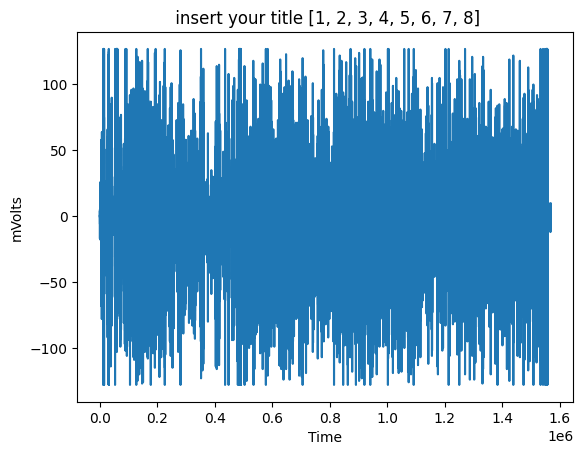

In [8]:
channel = [x for x in range(1,9)] # Create channel variables to be used

plt.figure()
ax = emg_df['EMG_'+str(channel[0])].plot()
plt.title(' insert your title ' + str(channel))
plt.ylabel('mVolts')
plt.xlabel('Time')
plt.show()


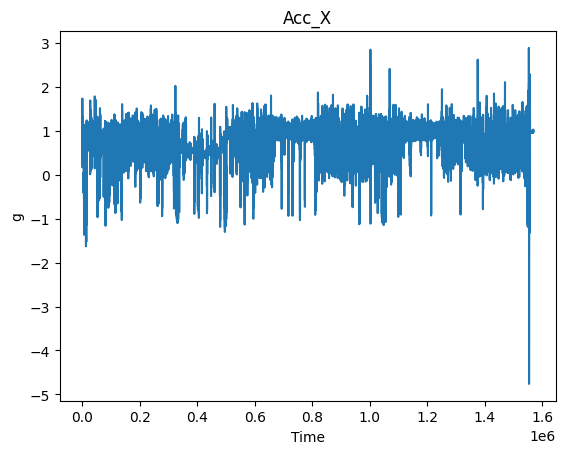

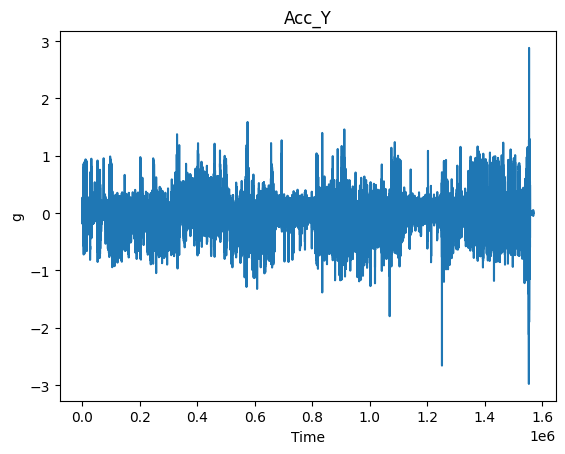

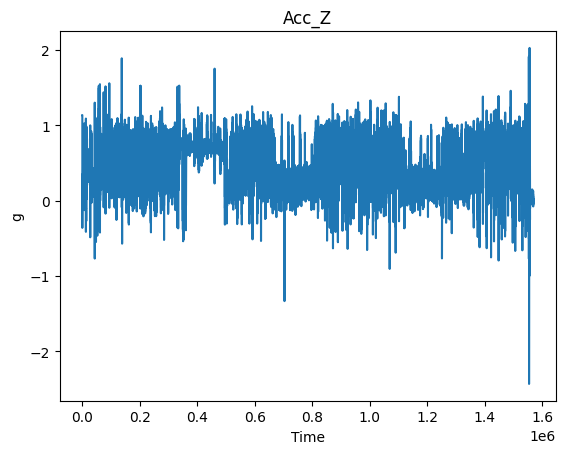

In [9]:
# Plotting multiple channels at once

for channel in ['X','Y','Z']:
    plt.figure()
    emg_df['Acc_'+channel].plot()
    plt.title('Acc_'+str(channel))
    plt.ylabel('g')
    plt.xlabel('Time')
    plt.show()

## Signal Rectification

The signal is noisy and difficult to interpret, rectifying it allows for more clear visualization of the data.

In [10]:
rectified_signal_df = emg_df.copy() # Copy the original dataframe to avoid overwriting or making changes to it

for col in ['EMG_'+str(i) for i in range(1,9)]:
    rectified_signal_df[col] = rectified_signal_df[col].apply(abs) # Get the absolute value for all the channels

display(rectified_signal_df)

,DeviceID,Warm?,Sync,Arm,Timestamp,Orientation_W,Orientation_X,Orientation_Y,Orientation_Z,Acc_X,...,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,Locked,RSSI,Roll,Pitch,Yaw
0,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,2,1,1,1,1,False,0,0.398451,-1.233521,1.567341
1,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,3,1,1,0,0,False,0,0.398451,-1.233521,1.567341
2,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,0,1,2,1,1,False,0,0.398451,-1.233521,1.567341
3,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,0,0,1,2,1,False,0,0.398451,-1.233521,1.567341
4,2291479052128,warm,True,left,2019-02-14 14:46:53 756350,-0.519470,-0.484497,0.291138,-0.640930,1.186035,...,0,2,1,1,1,False,0,0.420894,-1.246889,1.542884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569135,2291479052352,True,False,unknown,2019-02-14 16:14:04 919846,0.176941,0.678650,-0.692627,0.168640,0.981934,...,2,2,3,0,4,False,0,2.853115,-1.549873,-2.360197
1569136,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,0,1,1,2,3,False,0,2.853115,-1.549873,-2.360197
1569137,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,4,5,1,0,2,False,0,2.853115,-1.549873,-2.360197
1569138,2291479052352,True,False,unknown,2019-02-14 16:14:04 941786,0.174622,0.678345,-0.693115,0.170166,0.985352,...,4,7,4,1,2,False,0,3.094938,-1.549416,-2.602545


## Task 1: Plot the rectified signals

In [11]:
''' 
Insert the code to plot the rectified signals here
'''

' \nInsert the code to plot the rectified signals here\n'

## EMG Filtering

Applying Absolute value to the signal helps clean it up, to get rid of the noise in the signal, a bandpass filter is created and the signal is passed through. this is done with the help of the `scipy` library.

In [12]:
import scipy as sp
import scipy.signal

def filteremg(emg, low_pass=3, sfreq=200, high_band=20, low_band=95):
    """
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    # Zero mean emg signal
    emg = emg - emg.mean()
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass', analog=True)
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, fs=sfreq, btype='lowpass')
    emg_envelope = sp.signal.lfilter(b2, a2, emg_rectified)
    
    return emg_envelope
    

filt_emg = emg_df.copy()
emg_keys = ['EMG_' + str(i) for i in range(1, 9)]
filt_emg[emg_keys] = filt_emg[emg_keys].apply(filteremg, raw=True)
display(filt_emg)

,DeviceID,Warm?,Sync,Arm,Timestamp,Orientation_W,Orientation_X,Orientation_Y,Orientation_Z,Acc_X,...,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,Locked,RSSI,Roll,Pitch,Yaw
0,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,6.670266e-15,4.433235e-15,2.397618e-14,1.543573e-14,1.082648e-14,False,0,0.398451,-1.233521,1.567341
1,2291479052128,warm,True,left,2019-02-14 14:46:53 744402,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,4.159580e-13,1.549720e-13,3.179866e-13,1.516144e-13,3.160609e-13,False,0,0.398451,-1.233521,1.567341
2,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,3.324597e-12,1.157121e-12,1.904514e-12,7.601768e-13,2.325938e-12,False,0,0.398451,-1.233521,1.567341
3,2291479052128,warm,True,left,2019-02-14 14:46:53 752382,-0.514465,-0.485779,0.287659,-0.645508,1.326660,...,1.409054e-11,4.785940e-12,7.224687e-12,2.727693e-12,9.580246e-12,False,0,0.398451,-1.233521,1.567341
4,2291479052128,warm,True,left,2019-02-14 14:46:53 756350,-0.519470,-0.484497,0.291138,-0.640930,1.186035,...,4.194065e-11,1.417963e-11,2.027093e-11,7.971904e-12,2.815630e-11,False,0,0.420894,-1.246889,1.542884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569135,2291479052352,True,False,unknown,2019-02-14 16:14:04 919846,0.176941,0.678650,-0.692627,0.168640,0.981934,...,7.130577e+00,8.889387e+00,6.433555e+00,5.996636e+00,5.501359e+00,False,0,2.853115,-1.549873,-2.360197
1569136,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,7.130299e+00,8.889286e+00,6.433168e+00,5.996207e+00,5.501073e+00,False,0,2.853115,-1.549873,-2.360197
1569137,2291479052352,True,False,unknown,2019-02-14 16:14:04 926902,0.176941,0.678650,-0.692627,0.168640,0.981934,...,7.130020e+00,8.889185e+00,6.432782e+00,5.995779e+00,5.500787e+00,False,0,2.853115,-1.549873,-2.360197
1569138,2291479052352,True,False,unknown,2019-02-14 16:14:04 941786,0.174622,0.678345,-0.693115,0.170166,0.985352,...,7.129743e+00,8.889085e+00,6.432396e+00,5.995350e+00,5.500501e+00,False,0,3.094938,-1.549416,-2.602545


## Task 2: Plot the filtered signal and obtain its mean and Standard deviation

In [13]:
''' Insert your code here '''

' Insert your code here '

## Power Spectral Density

Plotting the PSD of the signal can also give insight on the frequency distribution of the signal.

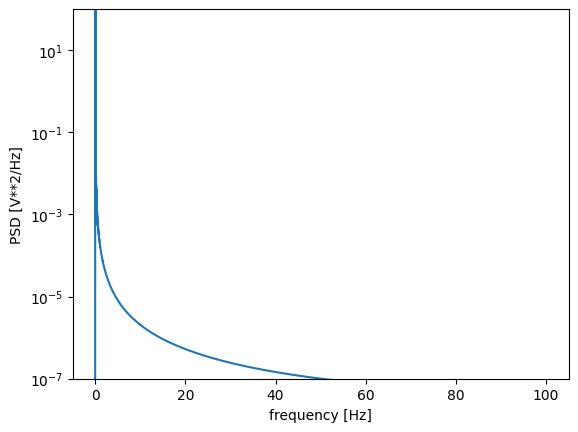

In [14]:
f, Pxx_den = sp.signal.periodogram(filt_emg['EMG_1'], 200)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# Part 2: XDF Data

`.xdf` is another format for storing binary data with rows and columns.

In [15]:
import pyxdf 

def get_channel_names(info):
    channels = info['desc'][0]['channels'][0]['channel']
    names = [chan['label'] for chan in channels ]
    units = [chan['unit'] for chan in channels ]
    return names, units


def xdf_to_dataframe(xdf_data):
    '''
        Converts from xdf to dataframe 
        Xdf Data should be a list of streams (dictionaries)
        Function returns a dictionary of dataframes, one dataframe per stream
    '''  
    dataframes = {}
    for stream in xdf_data:
        df = pd.DataFrame()
        data = stream['time_series']
        timestamps = stream['time_stamps']
        df['Time'] = timestamps
        chan_names, units = get_channel_names(stream['info'])
        counts = data.shape[0]
        for series, name, unit in zip(range(data.shape[1]), chan_names, units):
            df[name[0]]  = data[:, series]
            if unit:
                df[name[0] + '_Unit'] = np.repeat(unit, counts)
        
        for item in stream['info']:
            if item not in ['name', 'desc', 'data']:
                try:
                    df[item] = np.repeat(stream['info'][item], counts)
                except:
                    continue
        dataframes[stream['info']['name'][0]] = df
        
    return dataframes

In [16]:
data, header = pyxdf.load_xdf('Data/test.xdf')
dfs = xdf_to_dataframe(data)

In [17]:
display(dfs['BioRadio-20312'])

# Export the df to a csv file for later use
dfs['BioRadio-20312'].to_csv('Data/data.csv')

,Time,CH1,CH1_Unit,CH2,CH2_Unit,type,channel_count,nominal_srate,channel_format,source_id,...,session_id,hostname,v4address,v4data_port,v4service_port,v6address,v6data_port,v6service_port,stream_id,effective_srate
0,6998.573759,24.987793,mV,24.987793,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
1,6998.577665,-0.085449,mV,-0.048828,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
2,6998.581571,24.987793,mV,24.987793,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
3,6998.585477,-0.073242,mV,-0.036621,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
4,6998.589383,24.987793,mV,24.987793,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,7006.288357,0.122070,mV,0.000000,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
1976,7006.292263,-25.000000,mV,-25.000000,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
1977,7006.296169,0.073242,mV,-0.012207,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134
1978,7006.300076,-25.000000,mV,-25.000000,mV,RAW,2,256,float32,20312,...,default,GLE-1000-PC06,None,16572,16572,None,16572,16572,1,256.008134


# Task 3: With the newly created csv file, apply the following process:
- Load the data into a df and display
- Filter the data 
- Plot filtered data
- plot PSD